<a href="https://colab.research.google.com/github/chaimaaloug/pokemon_back/blob/main/projet_python_pokemon_pierre_version_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Pokémon/pokemons.csv')
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

types_df = pd.read_csv('/content/drive/MyDrive/Pokémon/pokemon-types.csv')
types_df = types_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [4]:
df

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,a strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"when the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,the plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,none,39,52,43,60,50,65,309,6,85,blaze solar-power,"obviously prefers hot places. when it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,none,58,64,58,80,65,80,405,11,190,blaze solar-power,"when it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,sinistcha,ordinary,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,not available
1013,1014,okidogi,legendary,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,not available
1014,1015,munkidori,legendary,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,not available
1015,1016,fezandipiti,legendary,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,not available


In [5]:
types_df

,types,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,0.5,NaN
1,fire,NaN,0.5,0.5,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,0.5,NaN,0.5,NaN,2.0,NaN
2,water,NaN,2.0,0.5,NaN,0.5,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,0.5,NaN,NaN,NaN
3,electric,NaN,NaN,2.0,0.5,0.5,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,grass,NaN,0.5,2.0,NaN,0.5,NaN,NaN,0.5,2.0,0.5,NaN,0.5,2.0,NaN,0.5,NaN,0.5,NaN
5,ice,NaN,0.5,0.5,NaN,2.0,0.5,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN
6,fighting,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN,0.5,0.5,0.5,2.0,0.0,NaN,2.0,2.0,0.5
7,poison,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.5,0.5,NaN,NaN,NaN,0.5,0.5,NaN,NaN,0.0,2.0
8,ground,NaN,2.0,NaN,2.0,0.5,NaN,NaN,2.0,NaN,0.0,NaN,0.5,2.0,NaN,NaN,NaN,2.0,NaN
9,flying,NaN,NaN,NaN,0.5,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,0.5,NaN,NaN,NaN,0.5,NaN


# Description

In [6]:
df.describe()

,id,hp,atk,def,spatk,spdef,speed,total,height,weight
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,509.000000,69.965585,77.425762,72.215339,69.855457,70.054081,67.060964,426.577188,12.053097,659.910521
std,293.726914,26.598461,29.828754,29.131082,29.557427,26.662701,28.724702,112.432492,12.435152,1198.306370
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000
25%,255.000000,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000,323.000000,5.000000,85.000000
50%,509.000000,67.000000,75.000000,70.000000,65.000000,66.000000,65.000000,450.000000,10.000000,280.000000
75%,763.000000,84.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,15.000000,682.000000
max,1017.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,200.000000,9999.000000


In [7]:
print(df.columns)

Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')


# Valeurs manquantes

In [8]:
total_valeurs_nulles = df.isnull().sum().sum()
print(f"Le nombre total de valeurs nulles dans le DataFrame est : {total_valeurs_nulles}")

Le nombre total de valeurs nulles dans le DataFrame est : 0


In [9]:
types_df.fillna(1, inplace=True)

In [10]:
types_df

,types,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
1,fire,1.0,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
2,water,1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
3,electric,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
4,grass,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
5,ice,1.0,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
6,fighting,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
7,poison,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
8,ground,1.0,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
9,flying,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


In [11]:
def comparer_types(type1, type2, types_df):
    type1 = type1.lower()
    type2 = type2.lower()

    efficacite_type1_contre_type2 = types_df.loc[types_df['types'] == type1, type2].values[0]
    efficacite_type2_contre_type1 = types_df.loc[types_df['types'] == type2, type1].values[0]

    # Afficher les efficacités
    print(f"Efficacité de {type1.capitalize()} contre {type2.capitalize()}: {efficacite_type1_contre_type2}")
    print(f"Efficacité de {type2.capitalize()} contre {type1.capitalize()}: {efficacite_type2_contre_type1}")

    # Déterminer lequel est potentiellement plus fort
    if efficacite_type1_contre_type2 > efficacite_type2_contre_type1:
        print(f"{type1.capitalize()} a un avantage théorique sur {type2.capitalize()}")
    elif efficacite_type1_contre_type2 < efficacite_type2_contre_type1:
        print(f"{type2.capitalize()} a un avantage théorique sur {type1.capitalize()}")
    else:
        print(f"{type1.capitalize()} et {type2.capitalize()} sont potentiellement équilibrés")

# Tester la fonction de comparaison des types
comparer_types('Water', 'Electric', types_df)

Efficacité de Water contre Electric: 1.0
Efficacité de Electric contre Water: 2.0
Electric a un avantage théorique sur Water


# Nombre total de Pokémon

In [12]:
nombre_total_pokemon = df.shape[0]
print(f"Le nombre total de Pokémon dans le dataset est : {nombre_total_pokemon}")

Le nombre total de Pokémon dans le dataset est : 1017


# Répartition du Nombre de Pokémon par Génération

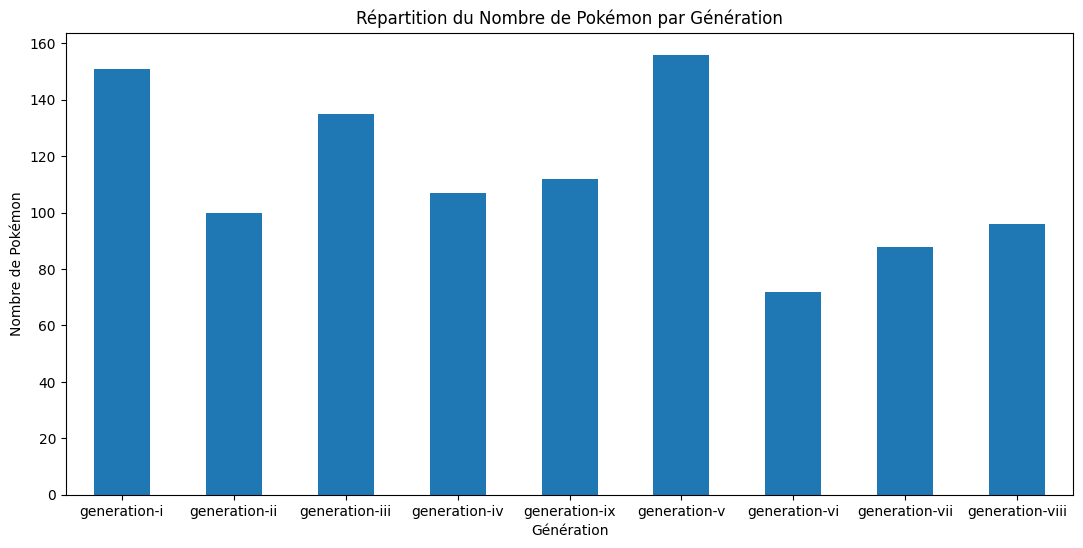

In [13]:
generation_counts = df['generation'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
generation_counts.plot(kind='bar')
plt.title('Répartition du Nombre de Pokémon par Génération')
plt.xlabel('Génération')
plt.ylabel('Nombre de Pokémon')
plt.xticks(rotation=0)
plt.show()


# Nombre de Pokemons par type

In [14]:
type_counts = df['type1'].value_counts()

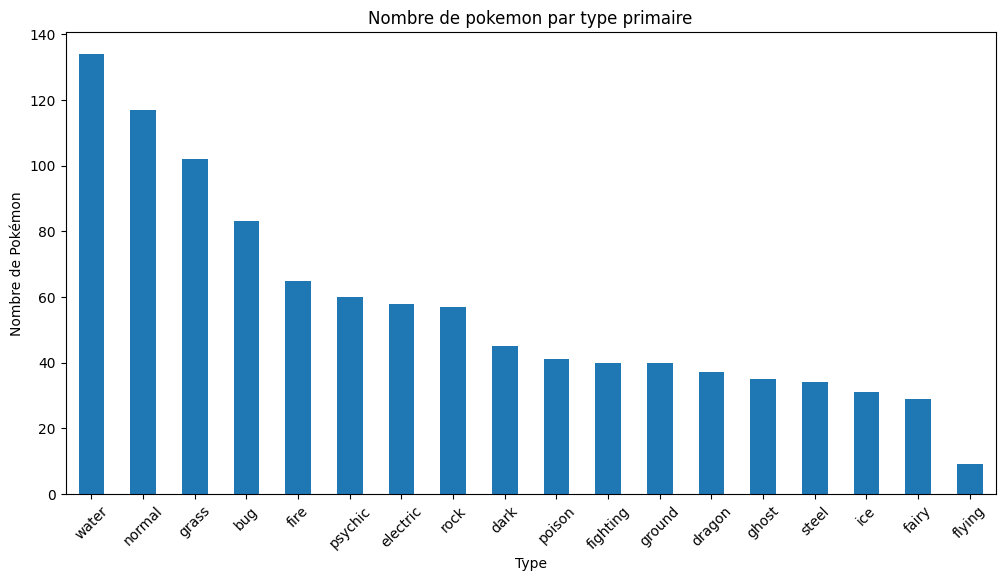

In [15]:
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Nombre de pokemon par type primaire')
plt.xlabel('Type')
plt.ylabel('Nombre de Pokémon')
plt.xticks(rotation=45)
plt.show()

# Moyenne des Statistiques par Type de *Pokémon*

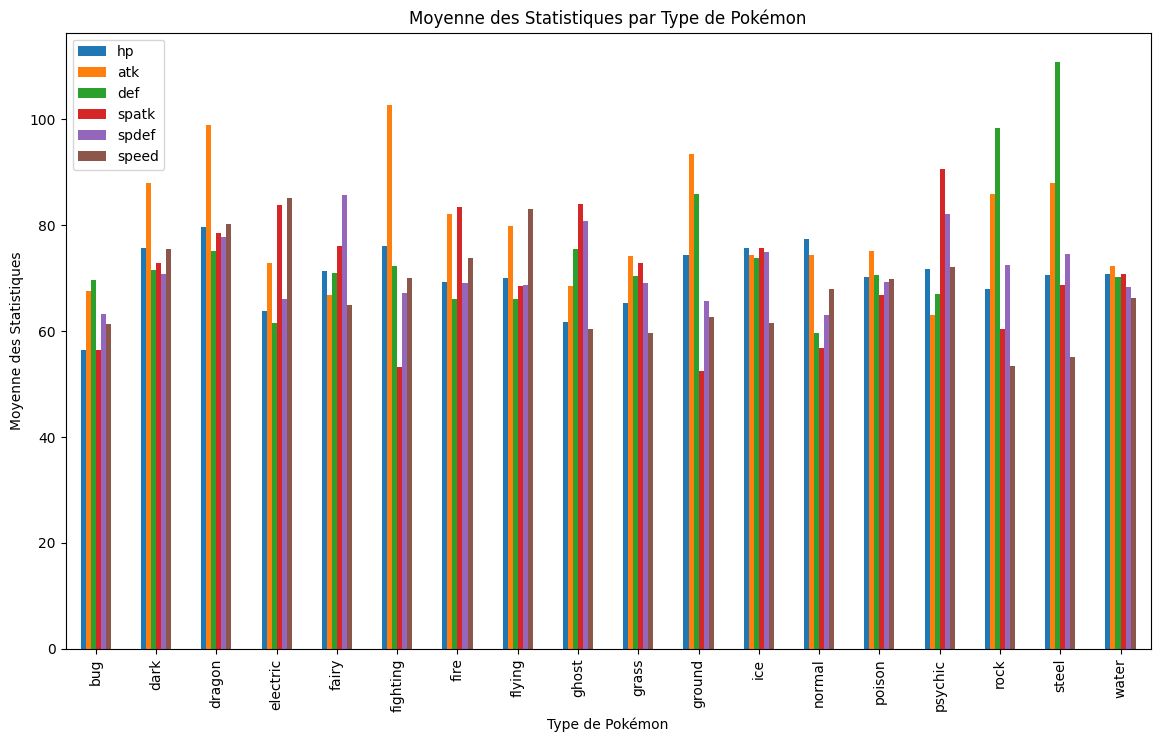

In [16]:
mean_stats_by_type = df.groupby('type1')[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed']].mean()

# Afficher ces moyennes sous forme de graphique à barres
mean_stats_by_type.plot(kind='bar', figsize=(14, 8))
plt.title('Moyenne des Statistiques par Type de Pokémon')
plt.ylabel('Moyenne des Statistiques')
plt.xlabel('Type de Pokémon')
plt.show()

# Comparaison entre Rangs et Statistiques des Pokémon

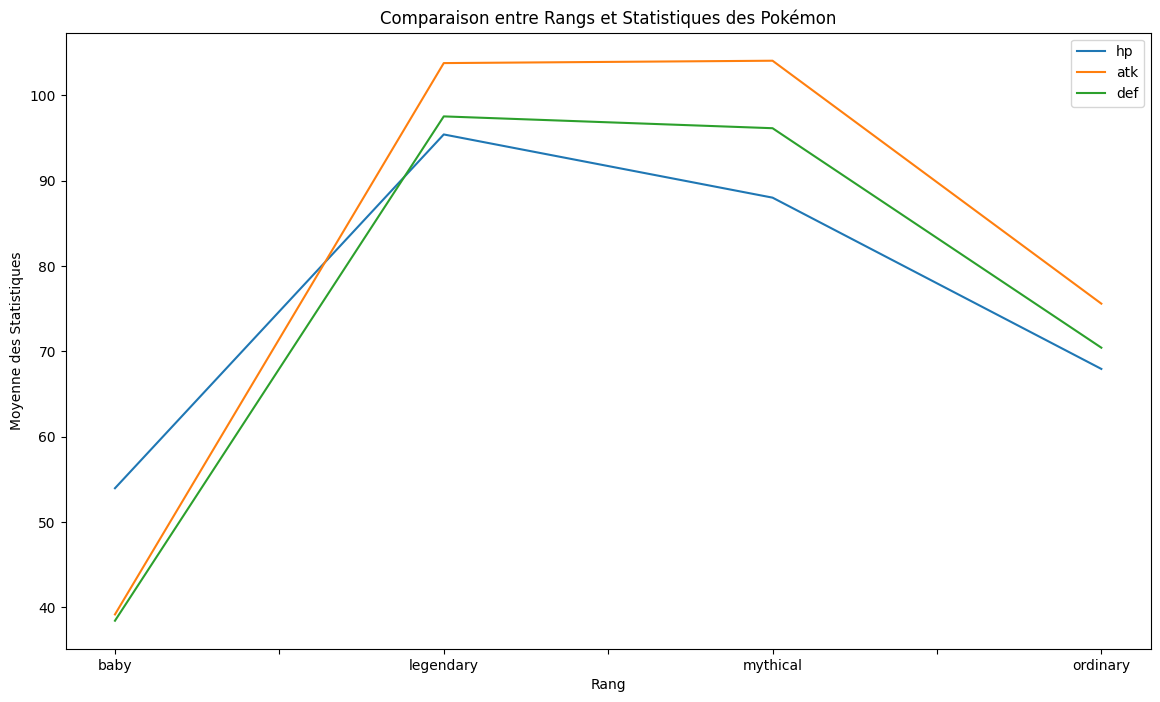

In [17]:
# Exemple de comparaison entre rangs et statistiques
rank_comparison = df.groupby('rank')[['hp', 'atk', 'def']].mean()

# Afficher sous forme de graphique
rank_comparison.plot(kind='line', figsize=(14, 8))
plt.title('Comparaison entre Rangs et Statistiques des Pokémon')
plt.ylabel('Moyenne des Statistiques')
plt.xlabel('Rang')
plt.show()


# Distribution des Aptitudes des Pokémon

In [18]:
unique_abilities_count = df['abilities'].nunique()
unique_abilities_count

617

In [19]:
abilities_count = df['abilities'].value_counts()

abilities_count.plot(kind='bar', figsize=(617, 20))
plt.title('Distribution des Aptitudes des Pokémon')
plt.ylabel('Nombre de Pokémon')
plt.xlabel('Aptitude')
plt.show()


# Relation entre Taille et Poids des Pokémon

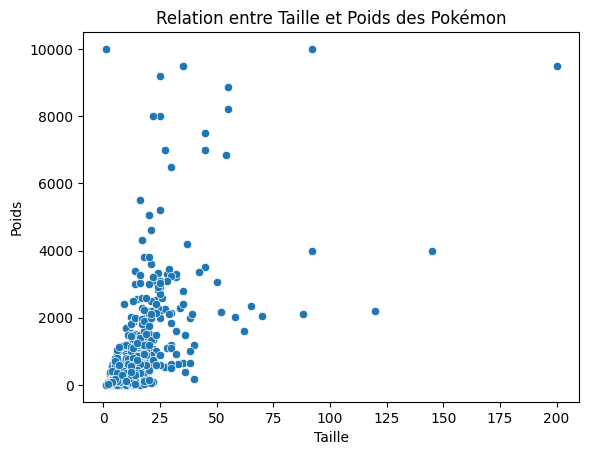

In [20]:
sns.scatterplot(data=df, x='height', y='weight')
plt.title('Relation entre Taille et Poids des Pokémon')
plt.xlabel('Taille')
plt.ylabel('Poids')
plt.show()


# Calculez les corrélations entre les variables

In [21]:
correlations = df.corr()
correlations

<ipython-input-21-4b58c49d872c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,id,hp,atk,def,spatk,spdef,speed,total,height,weight
id,1.000000,0.135733,0.169910,0.120355,0.107258,0.092482,0.086453,0.180588,0.068902,0.131381
hp,0.135733,1.000000,0.476778,0.293509,0.354587,0.366276,0.177896,0.664639,0.479604,0.473299
atk,0.169910,0.476778,1.000000,0.466070,0.283469,0.224800,0.348753,0.715787,0.384934,0.403840
def,0.120355,0.293509,0.466070,1.000000,0.203330,0.503644,0.002864,0.625806,0.349164,0.449731
spatk,0.107258,0.354587,0.283469,0.203330,1.000000,0.493796,0.425344,0.700433,0.314528,0.180704
spdef,0.092482,0.366276,0.224800,0.503644,0.493796,1.000000,0.210450,0.697510,0.275156,0.261802
speed,0.086453,0.177896,0.348753,0.002864,0.425344,0.210450,1.000000,0.552563,0.200632,0.037303
total,0.180588,0.664639,0.715787,0.625806,0.700433,0.697510,0.552563,1.000000,0.505250,0.454755
height,0.068902,0.479604,0.384934,0.349164,0.314528,0.275156,0.200632,0.505250,1.000000,0.627397
weight,0.131381,0.473299,0.403840,0.449731,0.180704,0.261802,0.037303,0.454755,0.627397,1.000000


# Matrice de Corrélation entre Types et Statistiques des Pokémon

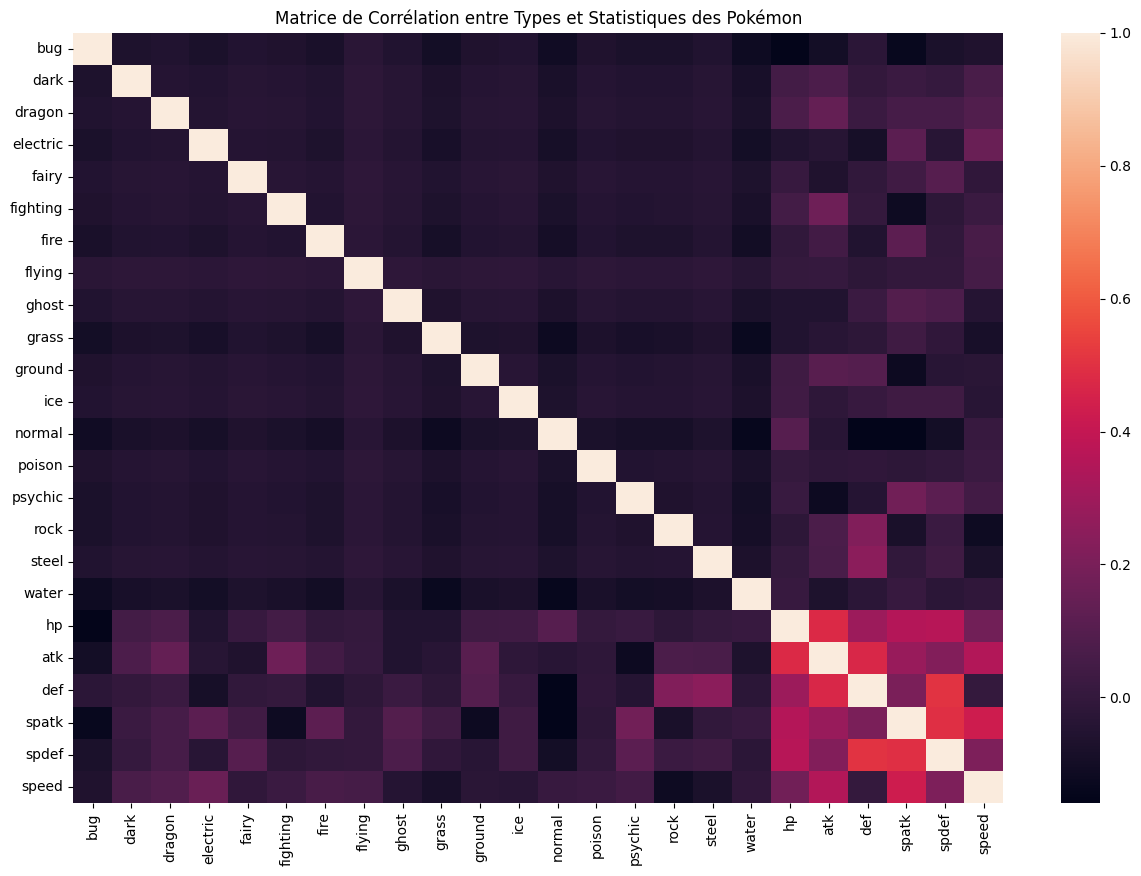

In [22]:
type_dummies = pd.get_dummies(df['type1'])

stats_data = df[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed']]
combined_data = pd.concat([type_dummies, stats_data], axis=1)

correlation_matrix = combined_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False)
plt.title('Matrice de Corrélation entre Types et Statistiques des Pokémon')
plt.show()

# Test efficacité des types

In [23]:
print(types_df.columns)

Index(['types', 'normal', 'fire', 'water', 'electric', 'grass', 'ice',
       'fighting', 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock',
       'ghost', 'dragon', 'dark', 'steel', 'fairy'],
      dtype='object')


In [24]:
# Convertir les types en minuscules pour correspondre aux noms des colonnes dans types_df
type1 = 'water'  # Correspond à 'Water' dans types_df
type2 = 'fire'   # Correspond à 'Fire' dans types_df

# Effectuer la recherche dans types_df en utilisant le nom de colonne correct
efficacite_type1_contre_type2 = types_df.loc[types_df['types'].str.lower() == type1, type2].values[0]
efficacite_type2_contre_type1 = types_df.loc[types_df['types'].str.lower() == type2, type1].values[0]

# Afficher les efficacités
print(f"Efficacité de {type1} contre {type2}: {efficacite_type1_contre_type2}")
print(f"Efficacité de {type2} contre {type1}: {efficacite_type2_contre_type1}")

# Déterminer lequel est potentiellement plus fort
if efficacite_type1_contre_type2 > efficacite_type2_contre_type1:
    print(f"{type1} a un avantage théorique sur {type2}")
elif efficacite_type1_contre_type2 < efficacite_type2_contre_type1:
    print(f"{type2} a un avantage théorique sur {type1}")
else:
    print(f"{type1} et {type2} sont potentiellement équilibrés")

Efficacité de water contre fire: 2.0
Efficacité de fire contre water: 0.5
water a un avantage théorique sur fire


# Merge des deux csv

In [25]:
print(df.columns)
print(types_df.columns)

Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')
Index(['types', 'normal', 'fire', 'water', 'electric', 'grass', 'ice',
       'fighting', 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock',
       'ghost', 'dragon', 'dark', 'steel', 'fairy'],
      dtype='object')


In [26]:
# # Vérifier si les données sont en minuscules dans les DataFrames fusionnés
# print("Premières lignes de merged_df_type1:")
# print(merged_df_type1.head())  # Remplacez merged_df_type1 par le nom de votre DataFrame fusionné

# print("\nPremières lignes de merged_df_type2:")
# print(merged_df_type2.head())  # Remplacez merged_df_type2 par le nom de votre DataFrame fusionné

In [27]:
type_pikachu = 'electric'
type_bulbasaur = 'grass'

# Vérifier si les types existent dans types_df
print(type_pikachu in types_df['types'].values)  # Doit retourner True
print(type_bulbasaur in types_df['types'].values)  # Doit retourner True


True
True


# Test comparatif entre deux Pokemon

In [28]:
def comparer_pokemon_double_type(nom_pokemon1, nom_pokemon2, df, types_df):
    # Obtenir les types de chaque Pokémon
    types_pokemon1 = df.loc[df['name'].str.lower() == nom_pokemon1.lower(), ['type1', 'type2']].values.flatten()
    types_pokemon2 = df.loc[df['name'].str.lower() == nom_pokemon2.lower(), ['type1', 'type2']].values.flatten()

    # Filtrer 'none' et convertir en minuscules
    types_pokemon1 = [t.lower() for t in types_pokemon1 if pd.notnull(t) and t.lower() != 'none']
    types_pokemon2 = [t.lower() for t in types_pokemon2 if pd.notnull(t) and t.lower() != 'none']

    # S'assurer que les colonnes et les index de types_df sont en minuscules
    types_df.columns = types_df.columns.str.lower()
    types_df.index = types_df.index.map(str).str.lower()  # Conversion de l'index en chaînes de caractères

    # Initialiser les efficacités
    efficacite_pokemon1, efficacite_pokemon2 = 1, 1

    # Calculer l'efficacité de chaque type de Pokémon 1 contre chaque type de Pokémon 2
    for type1 in types_pokemon1:
        for type2 in types_pokemon2:
            if type1 in types_df.index and type2 in types_df.columns:
                efficacite = types_df.at[type1, type2]
            else:
                efficacite = 1  # Par défaut, efficacité de 1 si le type n'est pas trouvé
            efficacite_pokemon1 *= efficacite

    # Calculer l'efficacité de chaque type de Pokémon 2 contre chaque type de Pokémon 1
    for type2 in types_pokemon2:
        for type1 in types_pokemon1:
            if type2 in types_df.index and type1 in types_df.columns:
                efficacite = types_df.at[type2, type1]
            else:
                efficacite = 1  # Par défaut, efficacité de 1 si le type n'est pas trouvé
            efficacite_pokemon2 *= efficacite

    # Vérifier s'il y a une immunité
    if efficacite_pokemon1 == 0:
        print(f"{nom_pokemon1.capitalize()} a un avantage significatif sur {nom_pokemon2.capitalize()} (immunité).")
        return
    if efficacite_pokemon2 == 0:
        print(f"{nom_pokemon2.capitalize()} a un avantage significatif sur {nom_pokemon1.capitalize()} (immunité).")
        return

    # Déterminer qui a l'avantage global
    if efficacite_pokemon1 > efficacite_pokemon2:
        print(f"{nom_pokemon1.capitalize()} a un avantage sur {nom_pokemon2.capitalize()} (efficacité : {efficacite_pokemon1}).")
    elif efficacite_pokemon1 < efficacite_pokemon2:
        print(f"{nom_pokemon2.capitalize()} a un avantage sur {nom_pokemon1.capitalize()} (efficacité : {efficacite_pokemon2}).")
    else:
        print("Les deux Pokémon ont un potentiel équivalent dans ce combat (efficacité égale).")

# Test de la fonction
comparer_pokemon_double_type('swampert', 'raikou', df, types_df)
comparer_pokemon_double_type('blastoise', 'raikou', df, types_df)
comparer_pokemon_double_type('dialga', 'tyranitar', df, types_df)

Les deux Pokémon ont un potentiel équivalent dans ce combat (efficacité égale).
Les deux Pokémon ont un potentiel équivalent dans ce combat (efficacité égale).
Les deux Pokémon ont un potentiel équivalent dans ce combat (efficacité égale).


In [29]:
# Afficher les premières valeurs de la colonne 'Types'
print(types_df.head())

      types  normal  fire  water  electric  grass  ice  fighting  poison  \
0    normal     1.0   1.0    1.0       1.0    1.0  1.0       1.0     1.0   
1      fire     1.0   0.5    0.5       1.0    2.0  2.0       1.0     1.0   
2     water     1.0   2.0    0.5       1.0    0.5  1.0       1.0     1.0   
3  electric     1.0   1.0    2.0       0.5    0.5  1.0       1.0     1.0   
4     grass     1.0   0.5    2.0       1.0    0.5  1.0       1.0     0.5   

   ground  flying  psychic  bug  rock  ghost  dragon  dark  steel  fairy  
0     1.0     1.0      1.0  1.0   0.5    0.0     1.0   1.0    0.5    1.0  
1     1.0     1.0      1.0  2.0   0.5    1.0     0.5   1.0    2.0    1.0  
2     2.0     1.0      1.0  1.0   2.0    1.0     0.5   1.0    1.0    1.0  
3     0.0     2.0      1.0  1.0   1.0    1.0     0.5   1.0    1.0    1.0  
4     2.0     0.5      1.0  0.5   2.0    1.0     0.5   1.0    0.5    1.0  


In [30]:
def comparer_pokemons(nom_pokemon1, nom_pokemon2):
    # Convertir les noms de Pokémon en minuscules
    nom_pokemon1 = nom_pokemon1.lower()
    nom_pokemon2 = nom_pokemon2.lower()

    # Sélection des données des deux Pokémon
    pokemon1_data = df[df['name'] == nom_pokemon1]
    pokemon2_data = df[df['name'] == nom_pokemon2]

    if not pokemon1_data.empty and not pokemon2_data.empty:
        # Extraire les caractéristiques pertinentes pour la comparaison
        types_pokemon1 = pokemon1_data.iloc[0]['type1'].lower()
        types_pokemon2 = pokemon2_data.iloc[0]['type1'].lower()
        total_pokemon1 = pokemon1_data.iloc[0]['total']
        total_pokemon2 = pokemon2_data.iloc[0]['total']
        # Ajoutez d'autres caractéristiques que vous souhaitez comparer...

        # Afficher les caractéristiques des deux Pokémon
        print(f"{nom_pokemon1}: Type({types_pokemon1}), Total({total_pokemon1})")
        print(f"{nom_pokemon2}: Type({types_pokemon2}), Total({total_pokemon2})")

        # Comparaison des caractéristiques
        if total_pokemon1 > total_pokemon2:
            print(f"{nom_pokemon1} est potentiellement plus fort que {nom_pokemon2}")
        elif total_pokemon1 < total_pokemon2:
            print(f"{nom_pokemon2} est potentiellement plus fort que {nom_pokemon1}")
        else:
            print(f"{nom_pokemon1} et {nom_pokemon2} sont potentiellement égaux en termes de force")
    else:
        print(f"Données pour {nom_pokemon1} ou {nom_pokemon2} introuvables. Vérifiez les noms des Pokémon.")

# Exemple d'utilisation
comparer_pokemons('pikachu', 'bulbasaur')




pikachu: Type(electric), Total(320)
bulbasaur: Type(grass), Total(318)
pikachu est potentiellement plus fort que bulbasaur
